Student Details

Name: Cathal Cronin

ID: 10131531

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

Sample code to plot SVM margin, 'gutters' and support vectors

In [2]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


# # plot the decision function
# ax = plt.gca()
# ax.set_aspect(aspect=1)
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

# # plot decision boundary and margins
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])
# # plot support vectors
# ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')



### Task 4
- Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

In [3]:
df = pd.read_csv("./dataset_1.csv")
df.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [4]:
# Look at some of the values 
df.head()
# column 2 looks like our target to classify.

,Unnamed: 0,0,1,2
0,0,-0.331982,-0.926029,1.0
1,1,-0.819310,-0.242368,0.0
2,2,0.922427,0.499088,1.0
3,3,-0.570793,0.562286,0.0
4,4,0.375817,-0.941165,1.0


- column 2 looks like our target to classify.

In [5]:
df['2'].value_counts()
# Looks like a 33% / 66% split in the values.

X = df.drop(["Unnamed: 0", "2"], axis=1) 
y = df["2"]

In [6]:
X_np = preprocessing.scale(X.values)
y_np = y.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.20, shuffle=True, stratify=y)

C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.kernel

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

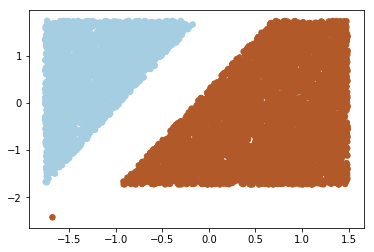

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

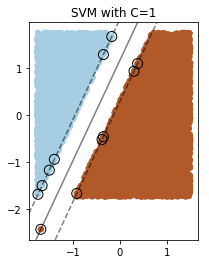

In [9]:
def plot_classifier(clf, X_train, y_train, C):
    
    # Code taken from above snippet.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    title = 'SVM with C=' + str(C)
    plt.title(title)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()

    
def classifier_score_metrics(clf, c_val, score):
    
    sup_vec_count = len(clf.support_vectors_)
    vec_by_class = clf.n_support_ 
    
    print("C Val: %s" % c_val)
    print("Support Vectors: %s" % sup_vec_count)
    print("Support Vectors By Class: %s" % vec_by_class)
    print("Score: %s" % score)

    return sup_vec_count
    
plot_classifier(clf, X_train, y_train, C)

C Val: 1
Support Vectors: 74
Support Vectors By Class: [37 37]
Score: 1.0


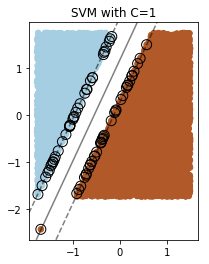

C Val: 1
Support Vectors: 4
Support Vectors By Class: [2 2]
Score: 1.0


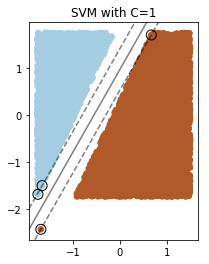

C Val: 1
Support Vectors: 3
Support Vectors By Class: [1 2]
Score: 1.0


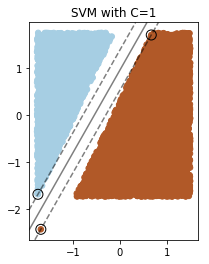

In [10]:
c_range = [0.1, 10, 100]
sv_list  = []

# Iterate variations of c and see how the results vary.
for c_val in c_range:
    clf = svm.SVC(kernel='linear', C=c_val)
    clf.kernel
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    sv_list.append(len(clf.support_vectors_))
    classifier_score_metrics(clf, C, score)
    plot_classifier(clf, X_train, y_train, C)


### Observations
- The above plots show that the varying c values.
- Hard margin SVM can work only when data is completely linearly separable without any errors (noise or outliers). 
- We can see from the plots our data is linearable seperable, without outliers so a hard margin works well here. So the score as always quite high.
- A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.
- A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area

- Ref: https://www.researchgate.net/post/Can_anyone_explain_to_me_hard_and_soft_margin_Support_Vector_Machine_SVM
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

### Task 5
- Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

In [11]:
# Ref: Thank you to Abhi and Michael.

def generate_gridsearch():
    # `poly` is taking 1+hr to complete, removing poly and reducing amount of grid search params.
    param_grid = [{'kernel': ['linear'], 'C': [0.01, 10, 100]},
                  {'kernel': ['rbf'], 'gamma': [0.01, 1, 'auto'], 'C': [0.01, 10, 100], 'degree': [2, 3]}]
    
    svm_classifier = svm.SVC()
    return GridSearchCV(svm_classifier, param_grid, cv=10, scoring='accuracy', n_jobs=10)
    
def run_gridsearch(grid_search, X_train, y_train, X_test, y_test):
    
    # Fit
    grid_search.fit(X_train, y_train)
    
    c_val = len(grid_search.best_estimator_.support_vectors_)
    samples_count = len(X_train)
    Eout = c_val / (samples_count - 1) 
    
    # Score 
    test_score = grid_search.best_estimator_.score(X_test, y_test)
    
    print("Params: %s" % grid_search.best_params_)
    print("Score: %s" % grid_search.best_score_ )
    print("Support Vector Count: %s" % c_val)
    print("Eout: %s" % Eout)
    print("Test Score: %s" % test_score)
    
    return grid_search

In [12]:
def plot_gridsearch(X_train, y_train, clf):
    
    # Snippet taken from earlier to plot
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)


    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.best_estimator_.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    ax.scatter(clf.best_estimator_.support_vectors_[:, 0], clf.best_estimator_.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

### Load Datasets

In [13]:
df1 = pd.read_csv("./dataset_1.csv")
df1.describe()

,Unnamed: 0,0,1,2
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,5000.000000,0.082508,-0.004040,0.668233
std,2887.184355,0.615153,0.575639,0.470871
min,0.000000,-0.999635,-1.400000,0.000000
25%,2500.000000,-0.496767,-0.496319,0.000000
50%,5000.000000,0.208210,-0.006960,1.000000
75%,7500.000000,0.614940,0.491170,1.000000
max,10000.000000,0.999983,0.999918,1.000000


In [14]:
df2 = pd.read_csv("./dataset_2.csv")
df2.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.000081,-0.000563,0.332800
std,2886.89568,0.574913,0.274366,0.471239
min,0.00000,-0.999780,-0.951513,0.000000
25%,2499.75000,-0.506704,-0.182047,0.000000
50%,4999.50000,0.001152,-0.002540,0.000000
75%,7499.25000,0.494439,0.180595,1.000000
max,9999.00000,0.999979,0.956530,1.000000


In [15]:
df3 = pd.read_csv("./dataset_3.csv")
df3.describe()

,Unnamed: 0,0,1,2
count,10000.00000,10000.000000,10000.000000,10000.00000
mean,4999.50000,-0.004890,-0.002304,0.88240
std,2886.89568,0.612958,0.616565,0.32215
min,0.00000,-0.999962,-0.999991,0.00000
25%,2499.75000,-0.571095,-0.585002,1.00000
50%,4999.50000,-0.007848,-0.007517,1.00000
75%,7499.25000,0.561483,0.585625,1.00000
max,9999.00000,0.999805,0.999790,1.00000


### Preprocessing

In [16]:
X1 = df1.drop(["Unnamed: 0", "2"], axis=1)
y1 = df1["2"]

X2 = df2.drop(["Unnamed: 0", "2"], axis=1)
y2 = df2["2"]

X3 = df3.drop(["Unnamed: 0", "2"], axis=1)
y3 = df3["2"]

In [17]:
X1_np = preprocessing.scale(X1.values)
y1_np = y1.values

X2_np = preprocessing.scale(X2.values)
y2_np = y2.values

X3_np = preprocessing.scale(X3.values)
y3_np = y3.values

### Split into train and test

In [18]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_np, y1_np, test_size=0.20, shuffle=True, stratify=y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_np, y2_np, test_size=0.20, shuffle=True, stratify=y2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_np, y3_np, test_size=0.20, shuffle=True, stratify=y3)

In [19]:
clf1 = run_gridsearch(generate_gridsearch(), X1_train, y1_train, X1_test, y1_test)

Params: {'kernel': 'linear', 'C': 10}
Score: 1.0
Support Vector Count: 4
Eout: 0.0005000625078134767
Test Score: 1.0


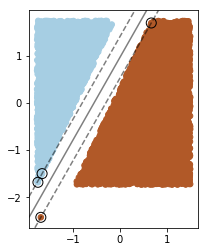

In [20]:
plot_gridsearch(X1_train, y1_train, clf1)

In [21]:
clf2 = run_gridsearch(generate_gridsearch(), X2_train, y2_train, X2_test, y2_test)

Params: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100, 'degree': 2}
Score: 0.868375
Support Vector Count: 2489
Eout: 0.31116389548693585
Test Score: 0.856


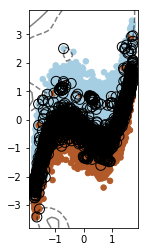

In [22]:
plot_gridsearch(X2_train, y2_train, clf2)

In [23]:
clf3 = run_gridsearch(generate_gridsearch(), X3_train, y3_train,  X3_test, y3_test)

Params: {'kernel': 'rbf', 'gamma': 1, 'C': 10, 'degree': 2}
Score: 0.987375
Support Vector Count: 265
Eout: 0.03312914114264283
Test Score: 0.9895


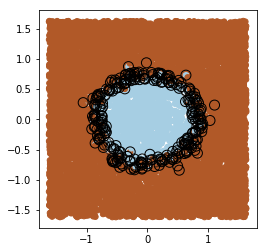

In [24]:
plot_gridsearch(X3_train, y3_train, clf3)

### Observations

- Dataset 1

The gridsearch chose the linear model. It's pretty clear from the graph that this dataset is linearly seperable. so that makes sense. It choose a value of 10 for C. We know that a large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation. A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area.

- Dataset 2

The gridsearch chose the rbf model. The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

We can see from the plot above the data is not lineraly seperable 

RBF seems to be more suited towards non-linearly seperable data

- Dataset 3

The gridsearch chose the rbf model. The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

We can see from the plot above the data is not lineraly seperable 

RBF seems to be more suited towards non-linearly seperable data

- https://stackoverflow.com/questions/17455302/gridsearchcv-extremely-slow-on-small-dataset-in-scikit-learn
- https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html
- https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html